# House Prices : Data Analysis & Machine Learning

## Summary :

**1 | Introduction**

* 1.1 Introduction to the dataset and the topic
* 1.2 First datasets observation

**2 | Data Analysis and Visualisation**

* 2.1 Missing values
* 2.2 Individual features  & outliers
    * Numerical columns
    * Categorical columns
    * Focus on SalePrice
* 2.3 Correlation with SalePrice
* 2.4 Feature engineering

**3 | Preprocessing**

* 3.1 Outliers
* 3.2 Impute missing value
* 3.3 Encode Categorical features
* 3.4 Scaling numerical features

**4 | Machine Learning**

* 4.1 Linear Regression
* 4.2 Ridge
* 4.3 Lasso
* 4.4 Random Forest Regressor
* 4.5 Xgboost

**5 | Conlusion**

* What is actualy our best model
* Our model is good for generalisation ?

## 1 | Introduction

**1.1 Introduction to the dataset and the topic**

[Kaggle House prices competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

**Competition Description**
![](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.  

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.  

**Practice Skills**
* Creative feature engineering 
* Advanced regression techniques like random forest and gradient boosting

**Acknowledgments**

The [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf) was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.   

**Goal**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.   

**Metric**

Submissions are evaluated on Root-Mean-Squared-Error (**RMSE**) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)  

**Submission File Format**

The file should contain a header and have the following format:   

    Id,SalePrice
    1461,169000.1
    1462,187724.1233
    1463,175221
    etc.

**1.2 First datasets observation**

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
from collections import OrderedDict #order python dictionnary

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
pal = sns.color_palette("Set2", 10)
sns.set_palette(pal)
#sns.palplot(pal)
sns.set_style("whitegrid")

import math

In [2]:
#import train and test datasets
#HpTrain = pd.read_csv("/home/nicolas/Notebook/Data/HousePricesTrain.csv")
HpTrain = pd.read_csv("../input/train.csv")
HpTrain['Type'] = 'Train'
#HpSubmission = pd.read_csv("/home/nicolas/Notebook/Data/HousePricesTest.csv")
HpSubmission = pd.read_csv("../input/test.csv")
HpSubmission['Type'] = 'Test'
HpSubmission['SalePrice'] = np.NaN
Hp = pd.concat([HpTrain,HpSubmission], ignore_index=True)
Hp.reset_index(drop=True,inplace=True)

In [3]:
Hp.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Type,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,Train,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,Train,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,Train,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,Train,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,Train,AllPub,192,2000,2000,2008


In [4]:
HpTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
Hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

## 2 | Data Analysis and Visualisation

**2.1 Missing values**

In [6]:
#on the full datase
nanvalues = Hp.isnull().sum().where(lambda x : x!=0).dropna().sort_values(ascending=False)
print(nanvalues)

PoolQC          2909.0
MiscFeature     2814.0
Alley           2721.0
Fence           2348.0
SalePrice       1459.0
FireplaceQu     1420.0
LotFrontage      486.0
GarageQual       159.0
GarageCond       159.0
GarageFinish     159.0
GarageYrBlt      159.0
GarageType       157.0
BsmtExposure      82.0
BsmtCond          82.0
BsmtQual          81.0
BsmtFinType2      80.0
BsmtFinType1      79.0
MasVnrType        24.0
MasVnrArea        23.0
MSZoning           4.0
BsmtFullBath       2.0
BsmtHalfBath       2.0
Utilities          2.0
Functional         2.0
Electrical         1.0
BsmtUnfSF          1.0
Exterior1st        1.0
Exterior2nd        1.0
TotalBsmtSF        1.0
GarageCars         1.0
BsmtFinSF2         1.0
BsmtFinSF1         1.0
KitchenQual        1.0
SaleType           1.0
GarageArea         1.0
dtype: float64


In [7]:
nbobs = len(Hp)
nanvalues = round(nanvalues/nbobs * 100)
nanvalues = nanvalues.to_frame()
nanvalues.reset_index(level=0, inplace=True)
nanvalues.columns = ['Col','PercentNaN']
nanvalues = nanvalues[nanvalues.Col != 'SalePrice']
nanvalues.head()


,Col,PercentNaN
0,PoolQC,100.0
1,MiscFeature,96.0
2,Alley,93.0
3,Fence,80.0
5,FireplaceQu,49.0


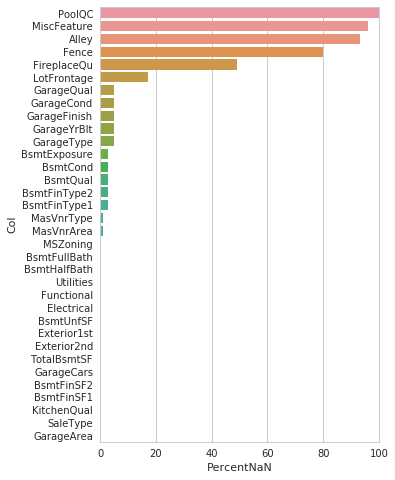

In [8]:
plt.figure(figsize=(5, 8))
sns.barplot(x='PercentNaN',y='Col',data=nanvalues);
plt.xticks(rotation=0) 
plt.xlim([0, 100])
plt.show()

I think it can be good to delete features with more than 50% of NaN values on the dataset.   
For the model we will try with imputatiion and without those features.

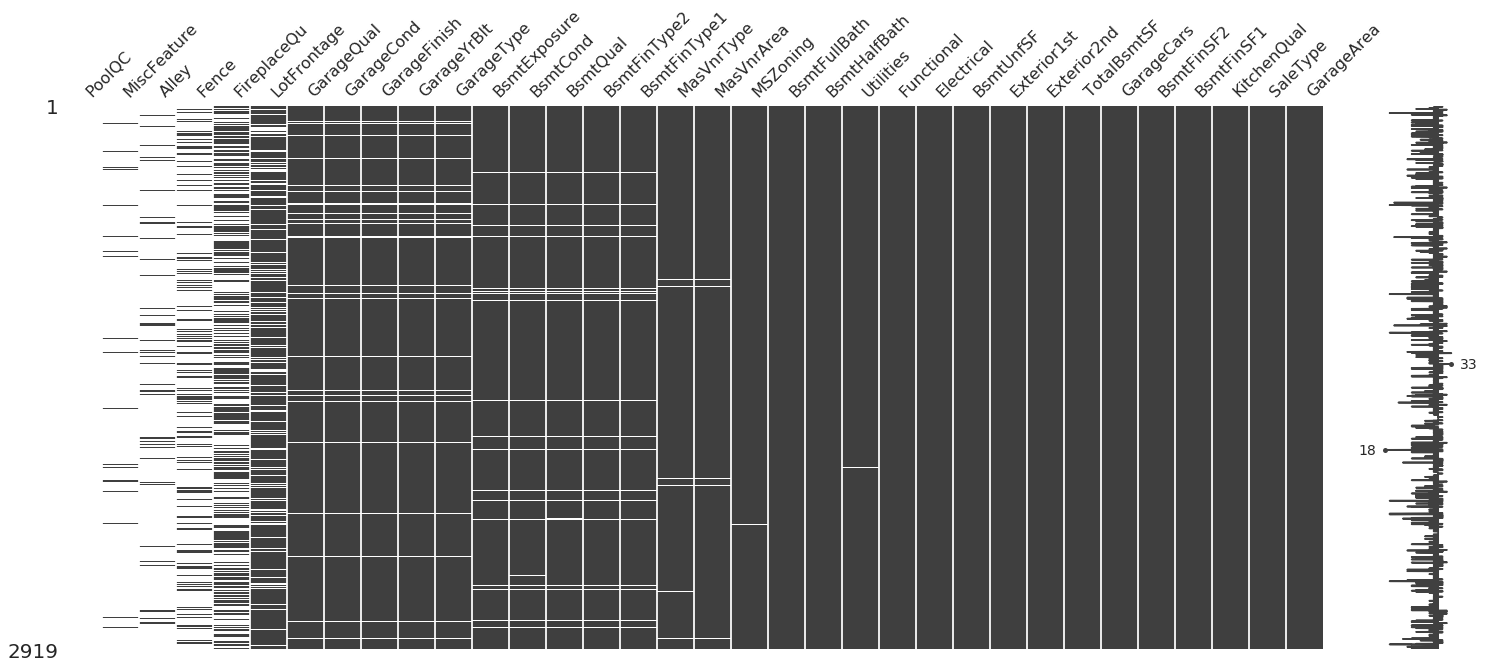

In [9]:
# Select only the columns with missing data. if we don't do that it's impossible to see something ..
# map of NaN values 
HpNullData = Hp[nanvalues.Col.values.tolist()]
msno.matrix(HpNullData)

**2.2 Individual features  & outliers**  

**Numerical columns**

In [10]:
#select all numerical colums and categorical columns in the dataset
print('Numerical Columns : '+str(len(Hp.select_dtypes(include=[np.number]).columns.tolist())))
print('Categorical Columns : '+str(len(Hp.select_dtypes(exclude=[np.number]).columns.tolist())))

# categorical feature who are number on the dataframe :
list1 = ['Id','SalePrice','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BedroomAbvGr','KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']
# extract all number column and remove categoricals
NumberColumns = Hp.select_dtypes(include=[np.number]).drop(list1,axis=1).columns.tolist()
print('Real number of Numerical Columns : '+str(len(NumberColumns)))
print(NumberColumns)
# list 1 will be concidered as categorical columns
list1.remove('Id')
list1.remove('SalePrice')
CatColumns2 = list1
#select all none numerical colums in the training dataset
CatColumns1 = Hp.select_dtypes(exclude=[np.number]).drop('Type',axis=1).columns.tolist()

CatColumns1.extend(CatColumns2)
CatColumns = CatColumns1
print('Real number of categorical Columns : '+str(len(CatColumns)))

for col in CatColumns:
    if Hp[col].dtype.name != 'object':
        Hp[col] = Hp[col].astype('object')

HpTrain = Hp[Hp.Type == 'Train']
print(CatColumns)
print(Hp.info())

Numerical Columns : 38
Categorical Columns : 44
Real number of Numerical Columns : 19
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GrLivArea', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF']
Real number of categorical Columns : 60
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities', 'MSSubClass', 'OverallQual', 'Ove

In [11]:
#plot ecdf
def PlotEcdf(data,title='',label='',line='none'):
    # Empirical cumulative distribution functions (ECDF)
    # Compute ECDF for a one-dimensional array of measurements and plot it.
    data = data.dropna()
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    plt.plot(x, y, marker='.',linestyle=line)
    plt.margins(0)
    title = title+' Cumulative Distribution'
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel('ECDF (% of oberservation)')
    plt.ylim(0,1)

#col = 'LotFrontage'
#PlotEcdf(HpTrain[col])

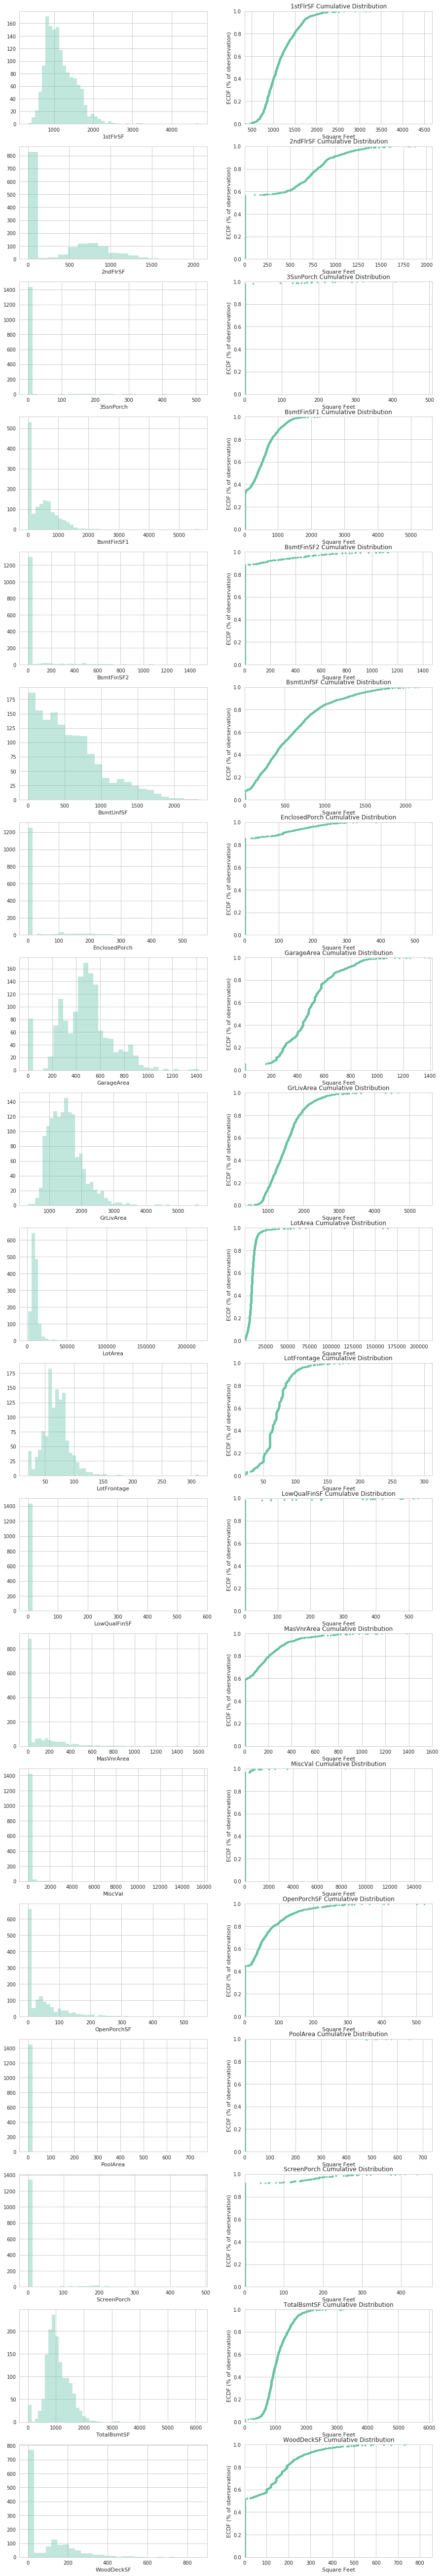

In [12]:
# distribution and cumulative distribution
i = 1
fig = plt.figure(figsize=(15, 5*(len(NumberColumns))))
nbcol = len(NumberColumns)
for col in NumberColumns:
    fig.add_subplot(nbcol,2,i)
    sns.distplot(HpTrain[col].dropna(),kde=False)
    i += 1
    fig.add_subplot(nbcol,2,i)
    PlotEcdf(HpTrain[col],title=col,label='Square Feet')
    i += 1
plt.show()
fig.clear()

**Categorical columns**

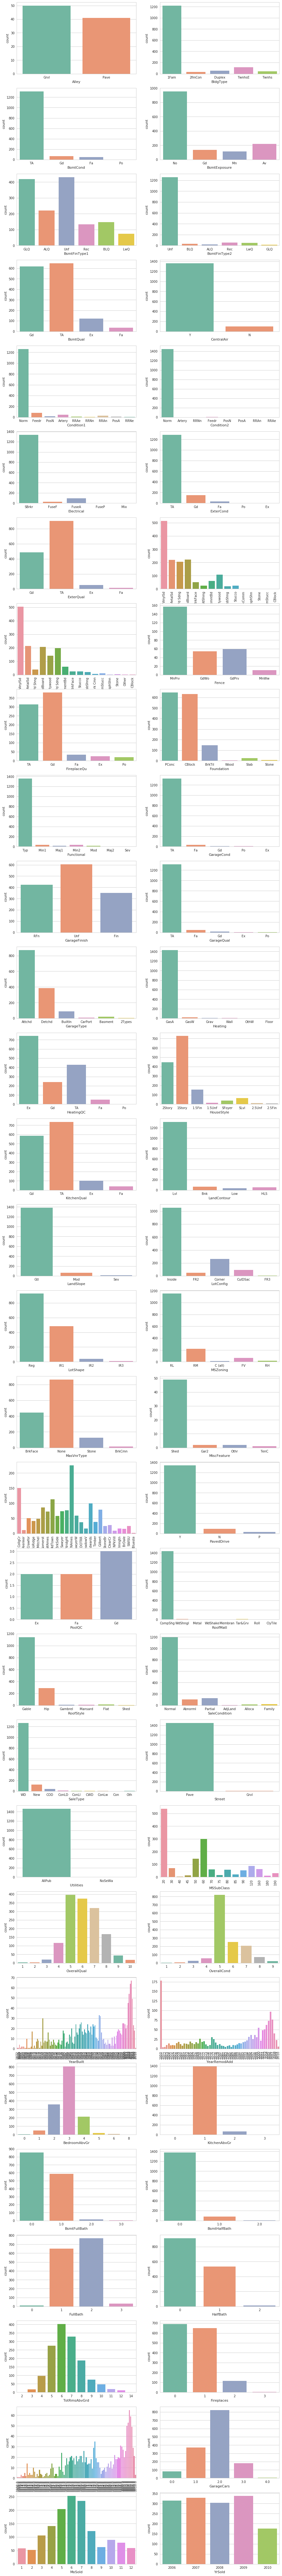

In [13]:
# Count Plot
nblinegraph = math.ceil(len(CatColumns)/2)
i = 1
fig = plt.figure(figsize=(15, 5*nblinegraph))
for col in CatColumns:
    fig.add_subplot(nblinegraph,2,i)
    sns.countplot(HpTrain[col].dropna())
    if len(HpTrain[col].value_counts().tolist())> 12 :
            plt.xticks(rotation=90) 
    i += 1
plt.show()
fig.clear()

In [14]:
def BoxplotSorted(df, by, column, stat, order=True):
    # create a new DataFrame with one column by col in the groupby
    # return a new dataframe sorted by median
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.dropna().groupby([by])})
    if stat == 'median':
        meds = df2.median().sort_values(ascending=order)
    elif stat == 'mean':
        meds = df2.mean().sort_values()
    elif stat == 'max':
        meds = df2.max().sort_values()
    elif stat == 'min':
        meds = df2.min().sort_values()
    return df2[meds.index]

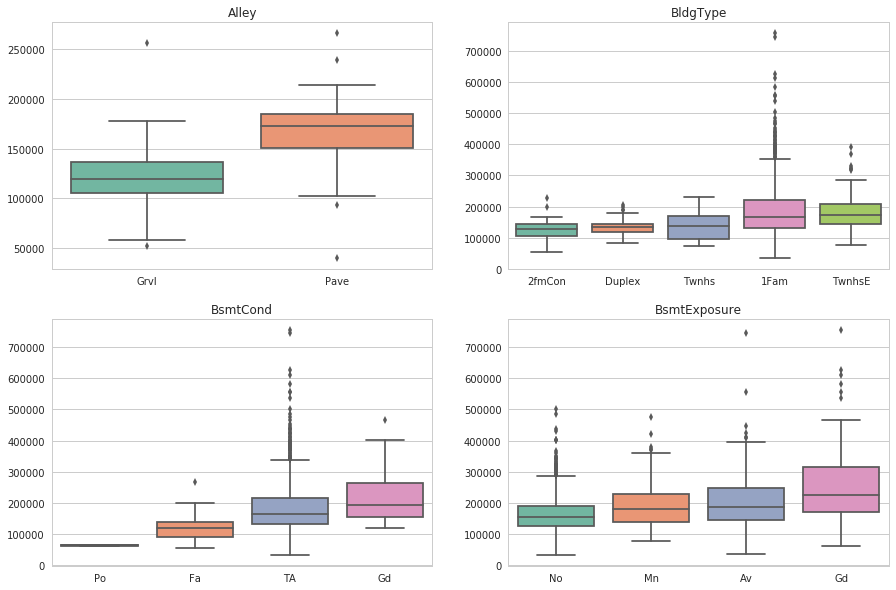

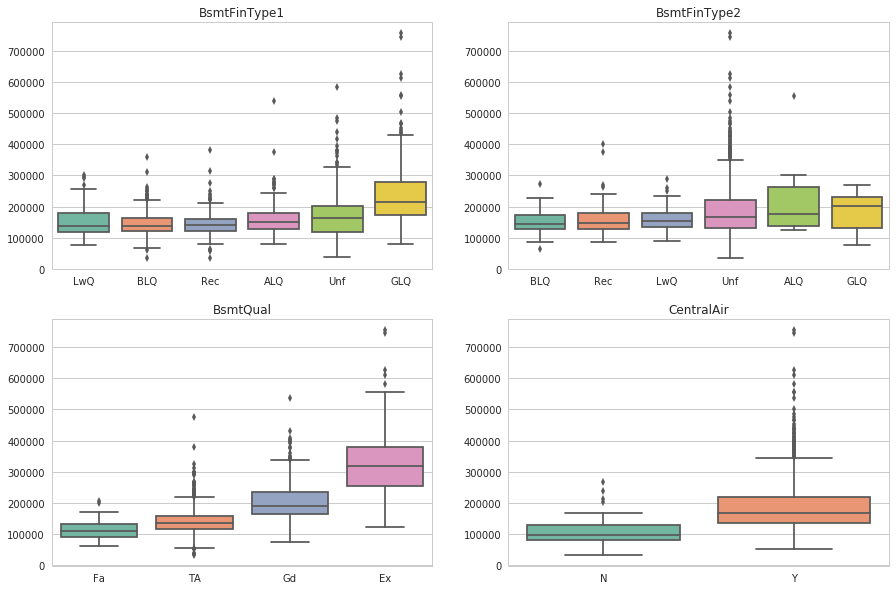

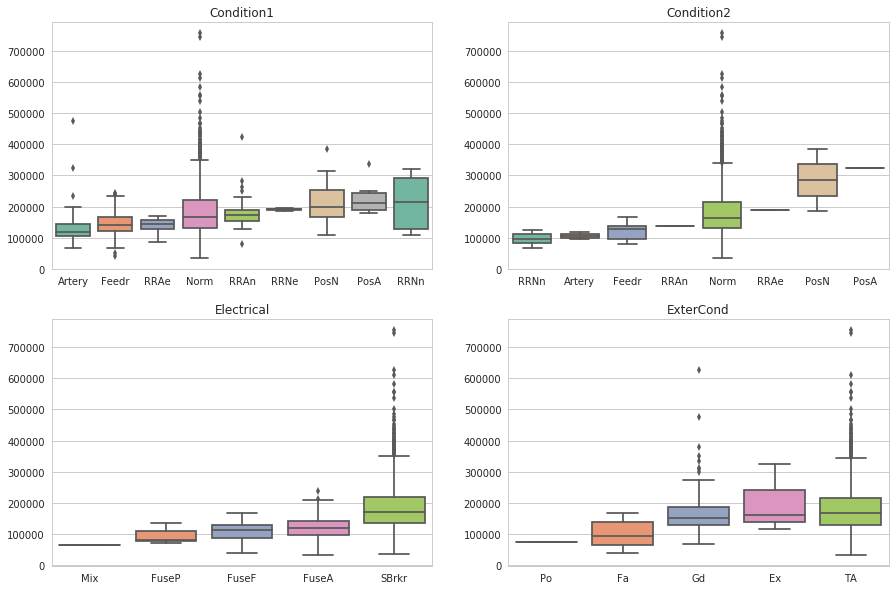

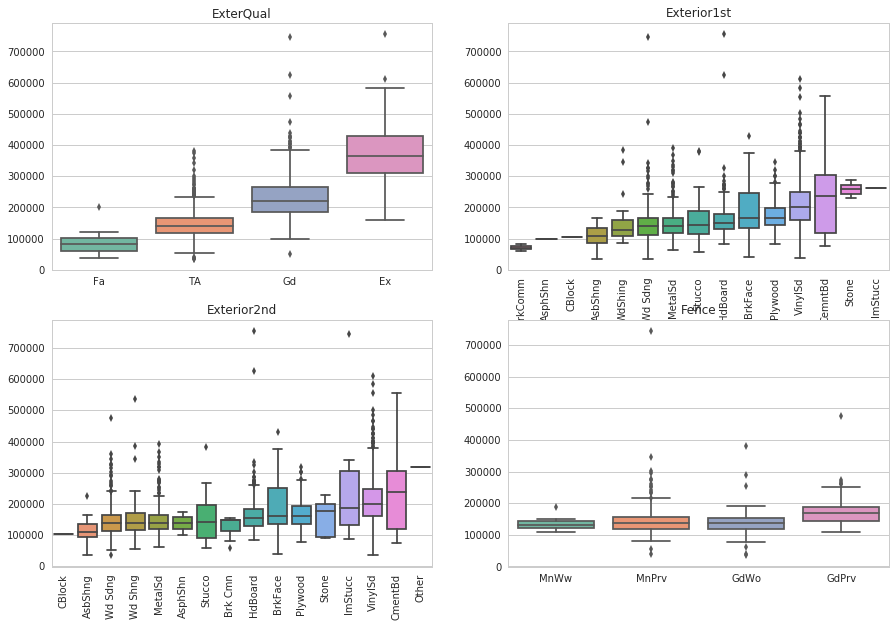

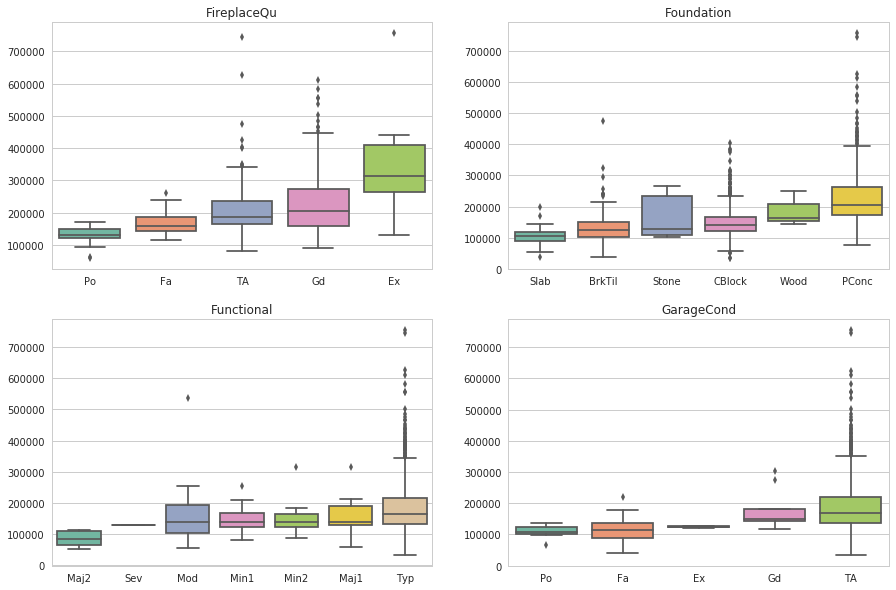

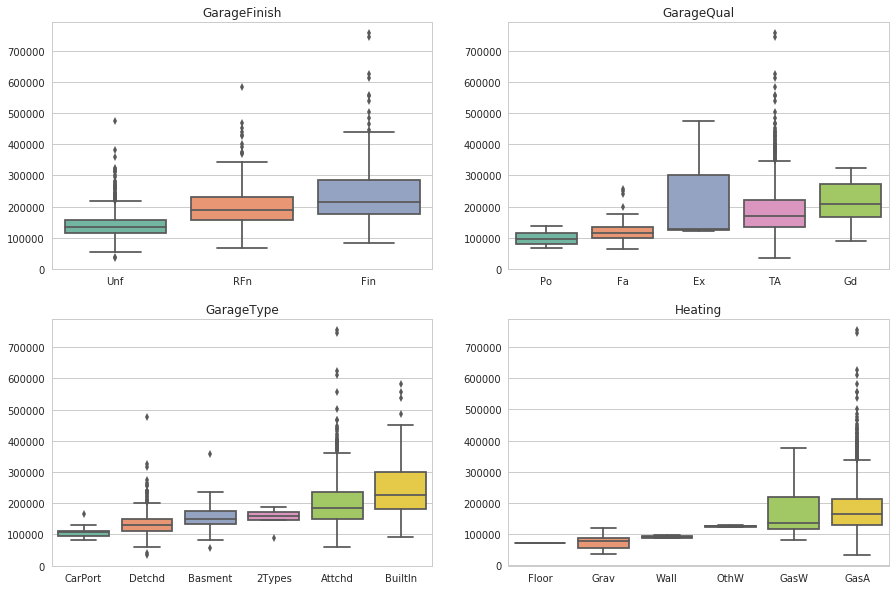

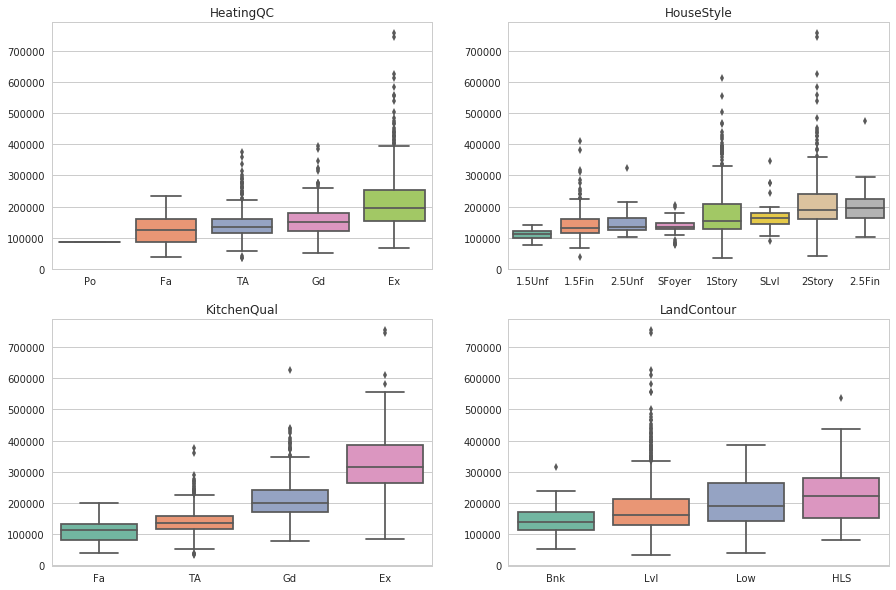

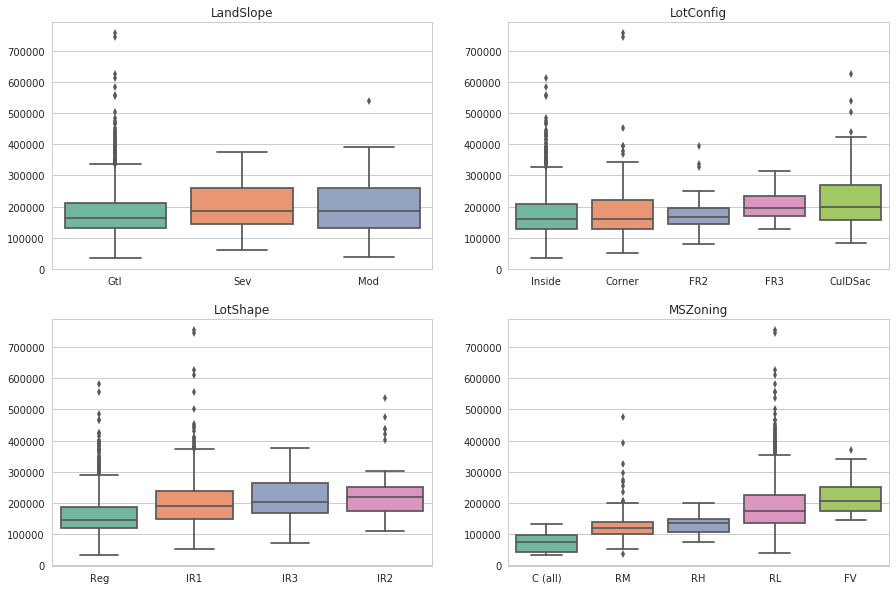

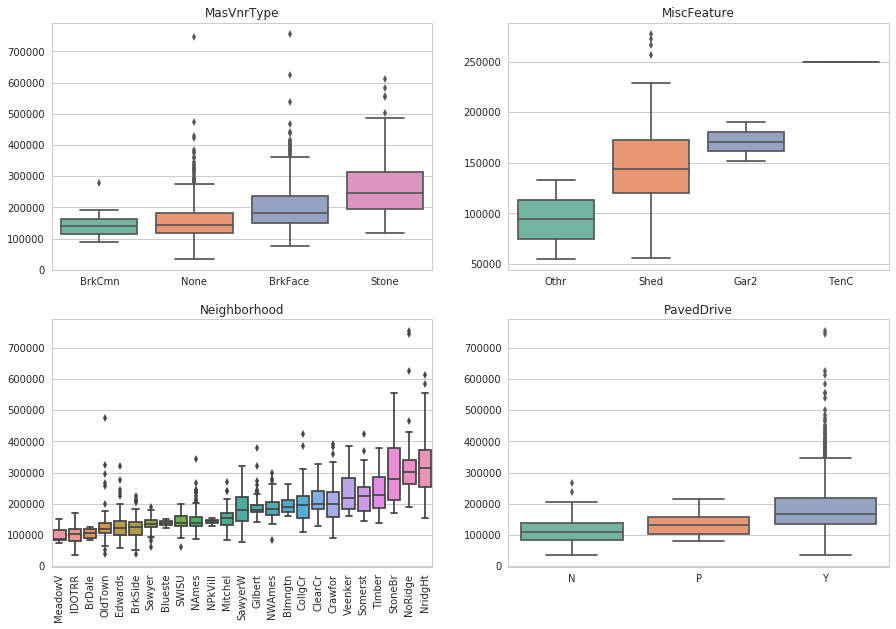

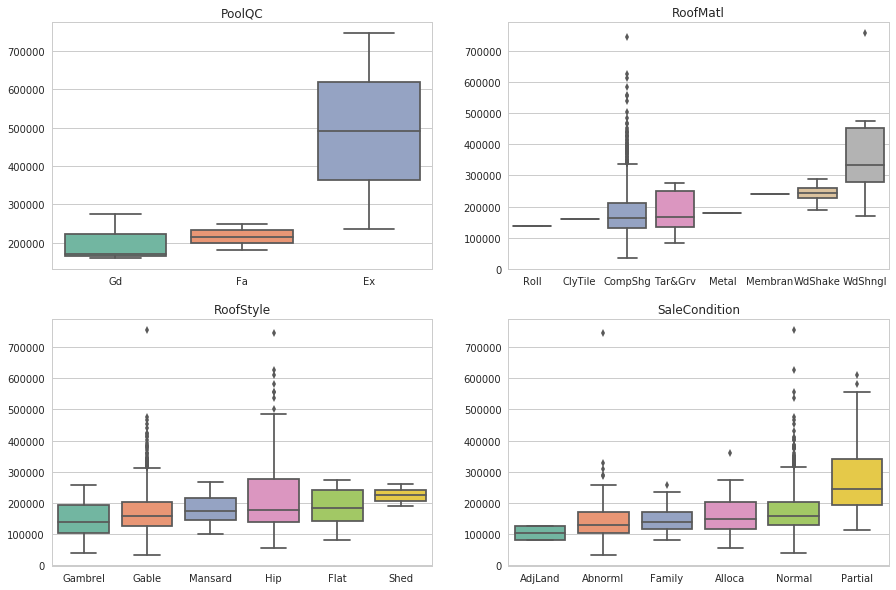

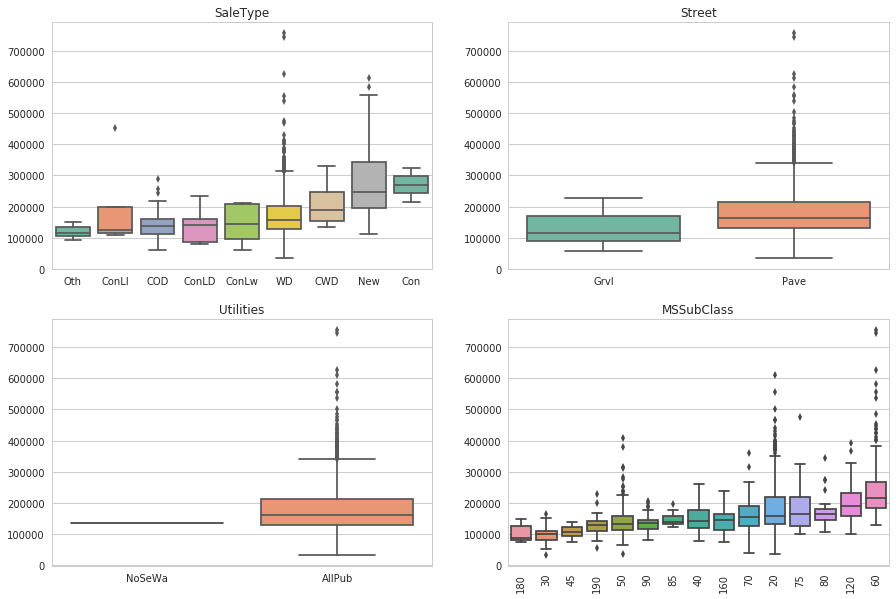

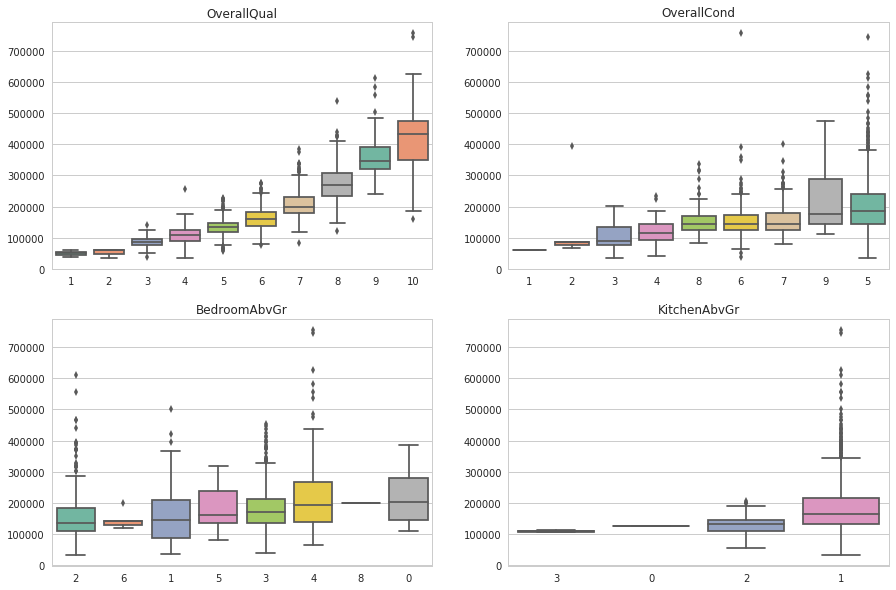

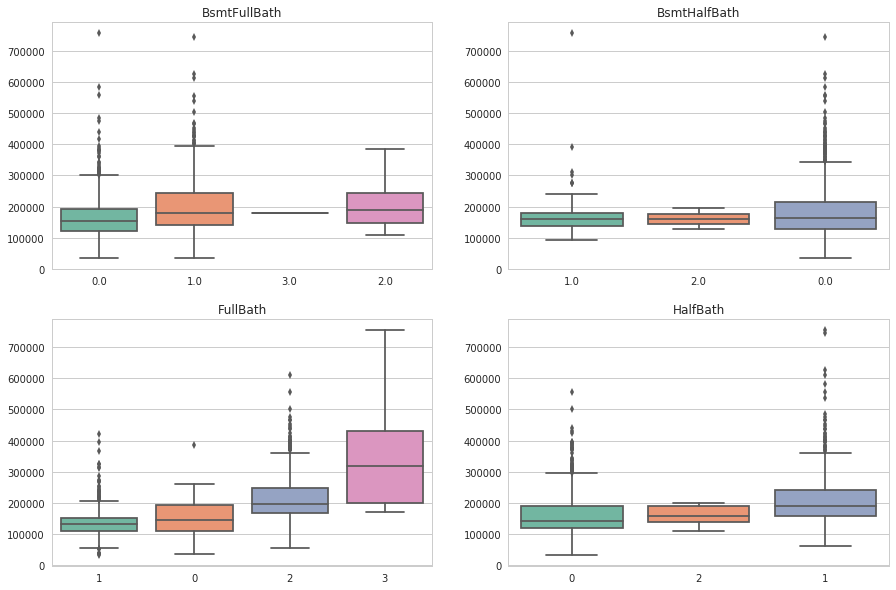

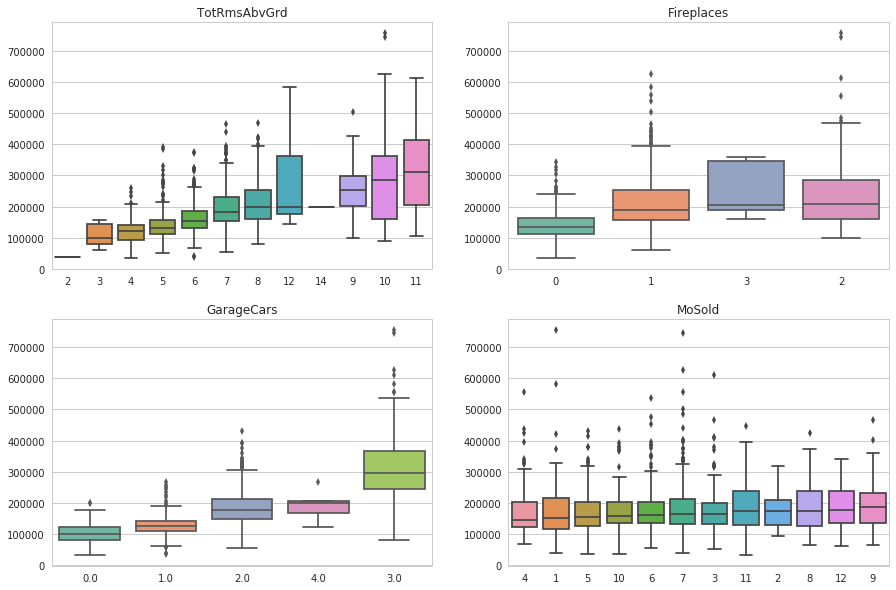

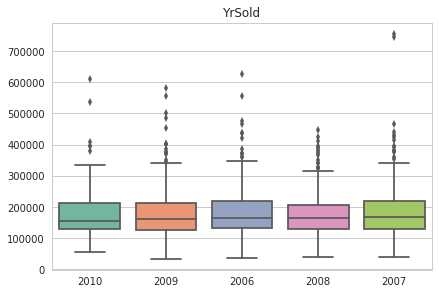

In [15]:
# sorted boxplot by median
CatCol = CatColumns
for c in ['YearBuilt','YearRemodAdd','GarageYrBlt']:  #There are too much values for box plot here
    if c in CatCol:
        CatCol.remove(c)
j = 0
step = 4 #group of 4 graphs
for i in range(0,len(CatCol),step):
    col = CatCol[i:j+step]
    j += 4
    fig = plt.figure(figsize=(15, 10))
    for c in range(0,len(col)):
        fig.add_subplot(2,2,c+1)
        df = BoxplotSorted(HpTrain[[col[c],"SalePrice"]], by=col[c], column="SalePrice", stat='median')
        sns.boxplot(data=df)
        plt.title(col[c])
        if len(df.columns.tolist())> 12 :
            plt.xticks(rotation=90) 
        #sns.swarmplot(data=df,size=2, color=".25", linewidth=0)
    plt.show()
    fig.clear()

**Sale price**

In [16]:
HpTrain.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<function matplotlib.pyplot.show>

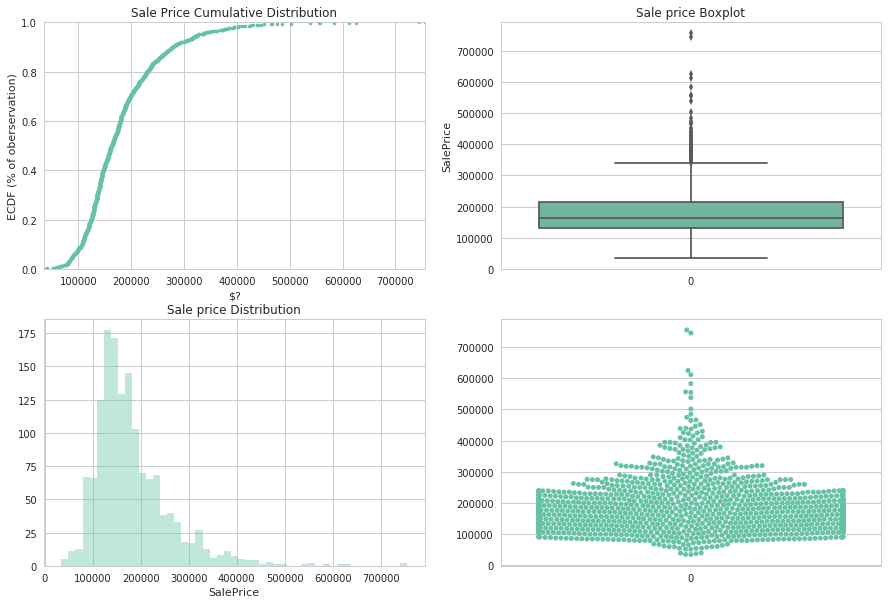

In [17]:
sp = HpTrain.SalePrice
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2,2,1)
PlotEcdf(sp,title='Sale Price',label='$?')
fig.add_subplot(2,2,2)
sns.boxplot(data=sp)
plt.title('Sale price Boxplot')
plt.ylabel('SalePrice')
fig.add_subplot(2,2,3)
sns.distplot(sp,kde=False)
plt.title('Sale price Distribution')
fig.add_subplot(2,2,4)
sns.swarmplot(data=sp)
plt.show

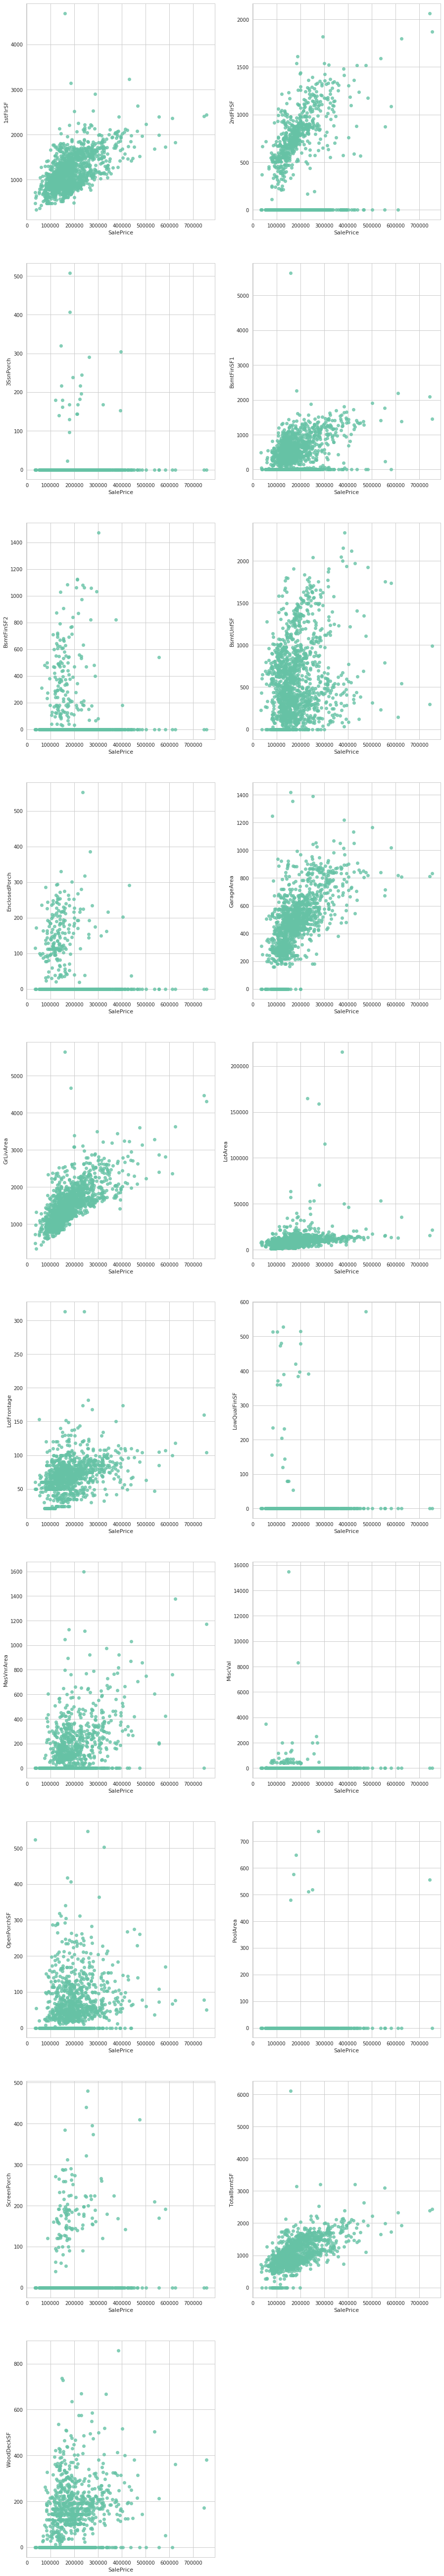

In [18]:
# Scatter plot of Numerical features vs SalePrice to see if there is a visual relation
i = 1
fig = plt.figure(figsize=(15, 5*len(NumberColumns)))
nbcol = math.ceil(len(NumberColumns)/2)
for col in NumberColumns:
    fig.add_subplot(nbcol,2,i)
    sns.regplot(x='SalePrice',y=col,data=HpTrain[[col,'SalePrice']].dropna(),fit_reg=False)
    i += 1
plt.show()
fig.clear()

**2.3 Correlation with SalePrice**

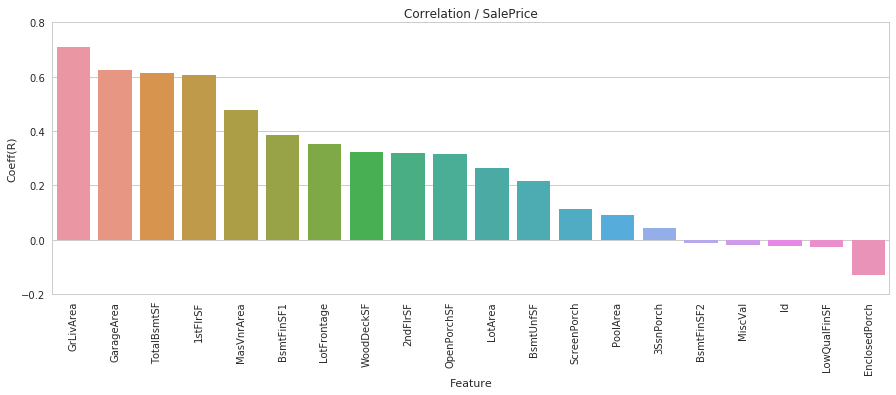

In [19]:
dfcor = HpTrain.corr()["SalePrice"].to_frame().sort_values(by=['SalePrice'],ascending=False)
dfcor.reset_index(level=0, inplace=True)
dfcor.columns = ['Feature', 'Coeff(R)']
dfcor = dfcor[dfcor.Feature != "SalePrice"]
plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='Coeff(R)', data=dfcor);
plt.xticks(rotation=90) 
plt.title('Correlation / SalePrice')
#plt.ylim(dfcor['Coeff(R)'].min()-0.2,dfcor['Coeff(R)'].max()+0.2)
plt.ylim(-.2,.8)
plt.show()

**2.4 Feature engineering**

In [20]:
#nothing for now

## 3 | Preprocessing data

**3.1 Outliers**

In [21]:
# remove outliers with the Standard Deviation based method 
def remove_outlier_std(df, col, n_std=3):
    col_std = df[col].std()
    col_mean = df[col].mean()
    #keep value where : col_value is < at col_mean + 3*std and return a dataframe
    df = df.loc[(df[col] < (col_mean + (n_std*col_std)))]
    return df

In [22]:
cols = NumberColumns
cols.append('SalePrice')
#Remove Outliers
"""
for col in cols:
    Hp = remove_outlier_std(Hp, col)
"""
print(Hp.shape)

(2919, 82)


**3.2 Impute missing value**

In [23]:
#print(Hp.PoolQC.value_counts())
Hp['PoolQC'] = Hp['PoolQC'].fillna(value='NA')

In [24]:
def impute_missing_values(df):
    nan_col = df.isnull().sum().where(lambda x : x!=0).dropna()
    nan_col = nan_col.index.tolist()
    for col in nan_col:
        if (df[col].dtype.name == "object"):
            mode_col = df[col].mode()[0]
            df[col] = df[col].fillna(value=mode_col)
        else:
            median_col = df[col].median()
            df[col] = df[col].fillna(value=median_col)
    return df

Hp = impute_missing_values(Hp)
print(Hp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null object
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2

In [25]:
print(Hp.isnull().sum().where(lambda x : x!=0).dropna())

Series([], dtype: float64)


In [26]:
Hp.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Type,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,Grvl,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,Train,AllPub,0,2003,2003,2008
1,1262,0,0,Grvl,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,Train,AllPub,298,1976,1976,2007


**3.3 Encode Categorical Features**

In [27]:
Hp = pd.get_dummies(Hp,drop_first=True,columns=CatColumns)

In [28]:
Hp.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,...,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,0,706.0,0.0,150.0,0,548.0,2003.0,1710,...,0,0,0,0,0,0,0,1,0,0
1,1262,0,0,978.0,0.0,284.0,0,460.0,1976.0,1262,...,0,0,0,0,0,0,1,0,0,0



**3.4 Scaling numerical features**

In [29]:
from sklearn.preprocessing import StandardScaler
#print(NumberColumns)
NumberColumns.remove('SalePrice')
scale = StandardScaler().fit(Hp[NumberColumns])
Hp[NumberColumns] = scale.transform(Hp[NumberColumns])

## 4 | Machine Learning

In [30]:
#usefull functions 

#Stock the results of different types of metrics (RMSE for House Price Regression here)
mmr = {}
def metrics_model_result(model,metrics):
    mmr[model] = metrics
    print(mmr)
#metrics_model_result('AlgoName',rmse)

roc_curve_data = {}
def concat_roc_data(algoname, fpr, tpr, auc):
    data = [fpr, tpr, auc]
    roc_curve_data[algoname] = data

# Plot ROC curve
def plot_roc_curve(fpr, tpr, title):
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Logistic Regression')
    plt.show()
    
#Features importance
def features_importance(data,model):
    features = data.columns.tolist()
    fi = model.feature_importances_
    sorted_features = {}
    for feature, imp in zip(features, fi):
        sorted_features[feature] = round(imp,3)
    # sort the dictionnary by value
    sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))
    #for feature, imp in sorted_features.items():
        #print(feature+" : ",imp)
    dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
    #dfvi.head()
    plt.figure(figsize=(15, 5))
    sns.barplot(x='Features', y='Importance', data=dfvi);
    plt.xticks(rotation=90) 
    plt.show()
    
# compare roc curve from multiple models
def plot_multiple_roc_curve(roc_curve_data): 
    plt.figure(figsize=(10, 10))
    for algo,rocdata in roc_curve_data.items():
        plt.plot(rocdata[0], rocdata[1], label=str(format(rocdata[2], '.3f'))+" : "+algo)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and Auc Score for each Model')
    plt.legend(borderaxespad=0.5,loc=4)
    plt.show()

In [31]:
SubmissionId = Hp[Hp.Type=='Test']['Id']
print(SubmissionId.shape)
HpSub = Hp[Hp.Type=='Test']
print(HpSub.shape)
HpSub = HpSub.drop(['Type','SalePrice','Id'],axis=1)
print(HpSub.shape)
HpTrain = Hp[Hp.Type=='Train']

Target = HpTrain.SalePrice
Features = HpTrain.drop(['SalePrice','Type','Id'],axis=1)

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size = 0.3, random_state=42)
"""
X_train = HpTrain.drop(['SalePrice','Type'],axis=1)
X_test = HpTrain.drop(['SalePrice','Type'],axis=1)
y_train = HpTrain.SalePrice
y_test = HpTrain.SalePrice
"""

(1459,)
(1459, 325)
(1459, 322)


"\nX_train = HpTrain.drop(['SalePrice','Type'],axis=1)\nX_test = HpTrain.drop(['SalePrice','Type'],axis=1)\ny_train = HpTrain.SalePrice\ny_test = HpTrain.SalePrice\n"

**4.1 Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = lr.predict(X_test)
y_pred[0:5]

array([148332.82714844, 335759.89648438,  77141.54101562, 168334.95019531,
       326198.69238281])

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

25032034013645.41

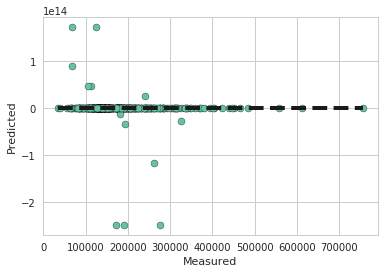

In [34]:
#Prediction vs test
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [35]:
#Submission
lr_prediction = lr.predict(HpSub)
submission = pd.DataFrame({
     "Id": SubmissionId,  #id from the test dataset
        "SalePrice": lr_prediction   #prediction compute from the test dataset
    })
#submission["SalePrice"] = submission["SalePrice"].apply(lambda sale: 0 if sale < 0 else sale)
#submission.to_csv('/home/nicolas/Notebook/Python/Kaggle_HousePrices/lr_submission.csv', index=False)

In [36]:
metrics_model_result('Linear Regression',rmse)

{'Linear Regression': 25032034013645.41}


**4.2 Ridge Regression**

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = ridge.predict(X_test)
y_pred[0:5]

array([150187.76384461, 334721.12302308,  77473.73840454, 175648.30497001,
       346259.14068188])

In [38]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

29431.9659891428

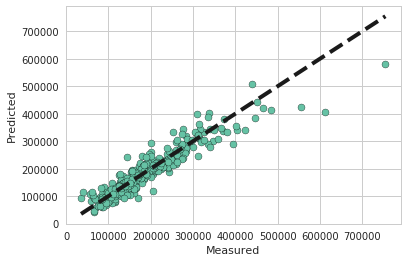

In [39]:
#Prediction vs test
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [40]:
#Submission
ridge_prediction = ridge.predict(HpSub)
submission = pd.DataFrame({
     "Id": SubmissionId,  #id from the test dataset
        "SalePrice": ridge_prediction   #prediction compute from the test dataset
    })
#submission.to_csv('/home/nicolas/Notebook/Python/Kaggle_HousePrices/ridge_submission.csv', index=False)

In [41]:
metrics_model_result('Ridge Regression',rmse)

{'Linear Regression': 25032034013645.41, 'Ridge Regression': 29431.9659891428}


**4.2 Lasso Regression**

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0)
lasso.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = lasso.predict(X_test)
y_pred[0:5]

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([147706.95584034, 336551.79300571,  76632.83784118, 168221.4729189 ,
       325744.63835118])

In [43]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

37687.50284387109

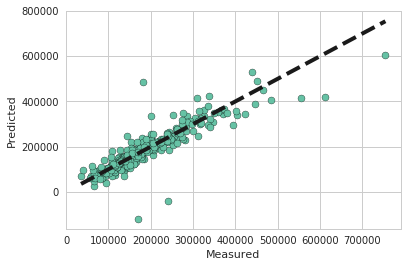

In [44]:
#Prediction vs test
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [45]:
#Submission
lasso_prediction = lasso.predict(HpSub)
submission = pd.DataFrame({
     "Id": SubmissionId,  #id from the test dataset
        "SalePrice": lasso_prediction   #prediction compute from the test dataset
    })

#submission.to_csv('/home/nicolas/Notebook/Python/Kaggle_HousePrices/lasso_submission.csv', index=False)

In [46]:
metrics_model_result('Lasso Regression',rmse)

{'Linear Regression': 25032034013645.41, 'Ridge Regression': 29431.9659891428, 'Lasso Regression': 37687.50284387109}


**4.3 Random Forest Regression**

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = rfr.predict(X_test)
y_pred[0:5]

array([136140. , 289158. , 120640. , 154503.4, 302469.9])

In [49]:
rmse =  np.sqrt(mean_squared_error(y_test,y_pred))
rmse

29445.680965304226

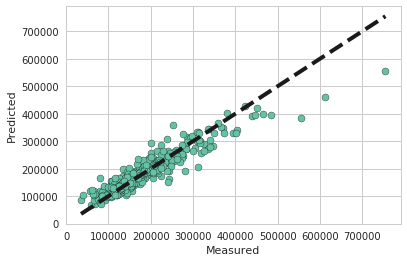

In [50]:
#Prediction vs test
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [51]:
#Submission
rfr_prediction = rfr.predict(HpSub)
submission = pd.DataFrame({
     "Id": SubmissionId,  #id from the test dataset
        "SalePrice": rfr_prediction   #prediction compute from the test dataset
    })

#submission.to_csv('/home/nicolas/Notebook/Python/Kaggle_HousePrices/rfr_submission.csv', index=False)

In [52]:
metrics_model_result('Random Forest Regressor',rmse)

{'Linear Regression': 25032034013645.41, 'Ridge Regression': 29431.9659891428, 'Lasso Regression': 37687.50284387109, 'Random Forest Regressor': 29445.680965304226}


**4.4 Xgboost Regression**

In [53]:
import xgboost

In [54]:
print(X_train[['GarageYrBlt','YearBuilt','YearRemodAdd']].info())
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, 
                           gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = xgb.predict(X_test)
y_pred[0:5]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 3 columns):
GarageYrBlt     1022 non-null float64
YearBuilt       1022 non-null object
YearRemodAdd    1022 non-null object
dtypes: float64(1), object(2)
memory usage: 31.9+ KB
None


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields YearBuilt, YearRemodAdd

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

In [ ]:
#Prediction vs test
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#Submission
xgb_prediction = xgb.predict(HpSub)
submission = pd.DataFrame({
     "Id": SubmissionId,  #id from the test dataset
        "SalePrice": xgb_prediction   #prediction compute from the test dataset
    })

submission.to_csv('/home/nicolas/Notebook/Python/Kaggle_HousePrices/xgb_submission.csv', index=False)

In [ ]:
metrics_model_result('XgBoost Regressor',rmse)

## Conclusion

In [ ]:
#Best model (RMSE metrics : lower is better)
res = pd.DataFrame(list(mmr.items()), columns=['Model', 'Rmse']).sort_values("Rmse", ascending=True)
print(res)

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Rmse', y='Model', data=res);
plt.xticks(rotation=90) 
#plt.xlim([0.6, 0.9])
plt.show()